In [1]:
import pandas as pd
import numpy as np

In [2]:
# read in all our data
bondora_data = pd.read_csv("Bondora_raw.csv")

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (34,37,38,80,82,83,89,90) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# set seed for reproducibility
np.random.seed(0)

In [3]:
# look at the first five rows of the bondora_data file. 
# I can see a handful of missing data already!
bondora_data.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


## Handling the missing values

In [56]:
# get the number of missing data points per column
missing_values_count = bondora_data.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:50]

ReportAsOfEOD                            0
LoanId                                   0
LoanNumber                               0
ListedOnUTC                              0
BiddingStartedOn                         0
BidsPortfolioManager                     0
BidsApi                                  0
BidsManual                               0
UserName                                 0
NewCreditCustomer                        0
LoanApplicationStartedDate               0
LoanDate                                 0
ContractEndDate                      75546
FirstPaymentDate                         0
MaturityDate_Original                    0
MaturityDate_Last                        0
ApplicationSignedHour                    0
ApplicationSignedWeekday                 0
VerificationType                        45
LanguageCode                             0
Age                                      0
DateOfBirth                              0
Gender                                  45
Country    

In [9]:
# how many total missing values do we have?
total_cells = np.product(bondora_data.shape)
total_missing = missing_values_count.sum()
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

24.374988717249494


In [10]:
# remove all the rows that contain a missing value
bondora_data.dropna()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory


In [11]:
# remove all columns with at least one missing value
columns_with_na_dropped = bondora_data.dropna(axis=1)
columns_with_na_dropped.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,ActiveScheduleFirstPaymentReached,Status,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,True,Repaid,False,115.0408,20.4222,0.00,0.00,1,83.0852,0
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,True,Repaid,False,140.6057,2.0227,0.00,0.00,2,255.6467,0
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,True,Late,True,203.1909,59.7626,116.35,414.07,0,0.0000,0
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,True,Repaid,False,57.5205,18.7323,0.00,0.00,1,134.2144,0
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,True,Repaid,False,319.5436,220.4200,0.00,0.00,1,146.9966,0


In [12]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % bondora_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 112 

Columns with na's dropped: 48


## Filling in missing values automatically

In [16]:
# get a small subset of the bondora dataset
subset_bondora_data = bondora_data.loc[:, 'Status':'PreviousEarlyRepaymentsCountBeforeLoan'].head()
subset_bondora_data

,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0
1,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0
2,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,0.0000,0.0,0
3,Repaid,False,NaN,31-60,NaN,NaN,NaN,NaN,57.5205,18.7323,0.0,0.0,0.00,0.00,1,134.2144,0.0000,0.0,0
4,Repaid,False,NaN,180+,NaN,NaN,NaN,NaN,319.5436,220.4200,0.0,2.4,0.00,0.00,1,146.9966,0.0000,0.0,0


In [17]:
# replace all NA's with 0
subset_bondora_data.fillna(0)

,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,Repaid,False,0,91-120,0,0,0,0.0,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0
1,Repaid,False,0,0,0,0,0,0.0,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0
2,Late,True,180+,180+,0,0,0,0.0,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,0.0000,0.0,0
3,Repaid,False,0,31-60,0,0,0,0.0,57.5205,18.7323,0.0,0.0,0.00,0.00,1,134.2144,0.0000,0.0,0
4,Repaid,False,0,180+,0,0,0,0.0,319.5436,220.4200,0.0,2.4,0.00,0.00,1,146.9966,0.0000,0.0,0


In [18]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
subset_bondora_data.fillna(method='bfill', axis=0).fillna(0)

,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,Repaid,False,180+,91-120,0.0,0.0,0.0,0.0,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0
1,Repaid,False,180+,180+,0.0,0.0,0.0,0.0,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0
2,Late,True,180+,180+,0.0,0.0,0.0,0.0,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,0.0000,0.0,0
3,Repaid,False,0,31-60,0.0,0.0,0.0,0.0,57.5205,18.7323,0.0,0.0,0.00,0.00,1,134.2144,0.0000,0.0,0
4,Repaid,False,0,180+,0.0,0.0,0.0,0.0,319.5436,220.4200,0.0,2.4,0.00,0.00,1,146.9966,0.0000,0.0,0


# SCALING AND NORMALIZATION

## scaling

In [19]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats


# for min_max scaling
from mlxtend.preprocessing import minmax_scaling


# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

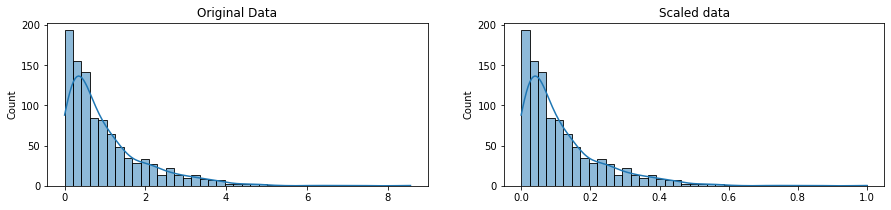

In [20]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

# normalization

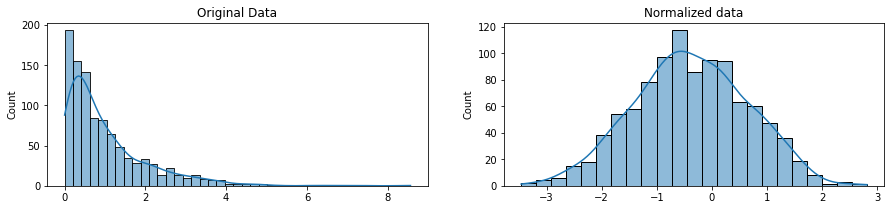

In [21]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()


# encoding

In [22]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import chardet

# set seed for reproducibility
np.random.seed(0)

In [23]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [24]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [25]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type
type(after)

bytes

In [26]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

In [27]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


In [28]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

In [29]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


In [30]:
# look at the first ten thousand bytes to guess the character encoding
with open("Bondora_raw.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


## Inconsistent Data Entry
Efficiently fix typos in your data.

In [32]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [34]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# set seed for reproducibility
np.random.seed(0)

## Do some preliminary text pre-processing
We'll begin by taking a quick look at the first few rows of the data.

In [35]:
bondora_data.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


In [37]:
# get all the unique values in the 'Country' column
loant = bondora_data['LoanId'].unique()

# sort them alphabetically and then take a closer look
loant.sort()
loant

array(['00011EF9-B8C8-4ECC-B28D-AAA000EC5469',
       '00023BD2-540D-43BE-8096-A466013CBE03',
       '00027AEE-2003-4CEA-8CFF-A37D008C0D1B', ...,
       'FFFF7137-BEF6-4AE6-A00B-AAD40112FF5B',
       'FFFFB2AD-46BC-4669-A66F-AA610103AB45',
       'FFFFFFF9-7E8D-47D2-A026-AA7E00766552'], dtype=object)

In [40]:
# convert to lower case
bondora_data['LoanId'] = bondora_data['LoanId'].str.lower()
# remove trailing white spaces
professors['LoanId'] = bondora_data['LoanId'].str.strip()

## Use fuzzy matching to correct inconsistent data entry
Alright, let's take another look at the 'Country' column and see if there's any more data cleaning we need to do.

In [45]:
# get all the unique values in the 'username' column
loant = bondora_data['UserName'].unique()

# sort them alphabetically and then take a closer look
loant.sort()
loant

array(['-inline-', '-ketu16-', '-kiisuke-', ..., 'äpu', 'Артур Зинатов',
       'людмила'], dtype=object)

In [42]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("KARU", bondora_data, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[(0              KARU
  1          koort681
  2               0ie
  3            Alyona
  4               Kai
              ...    
  134524    BO73K5A6A
  134525     BO311A49
  134526    BO41K639A
  134527     BO45A925
  134528    BO152923A
  Name: UserName, Length: 134529, dtype: object,
  5,
  'UserName'),
 (0                    HARJU
  1                 IDA-VIRU
  2                    PÄRNU
  3                    HARJU
  4                    TARTU
                  ...       
  134524         PÄIJÄT-HÄME
  134525    POHJOIS KARJAALA
  134526     VARSINAIS-SUOMI
  134527               VALGA
  134528               HARJU
  Name: County, Length: 134529, dtype: object,
  5,
  'County'),
 (0         1
  1         2
  2         0
  3         1
  4         1
           ..
  134524    0
  134525    1
  134526    0
  134527    1
  134528    1
  Name: NoOfPreviousLoansBeforeLoan, Length: 134529, dtype: int64,
  5,
  'NoOfPreviousLoansBeforeLoan'),
 (0          True
  1         False
  2      

In [43]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [51]:
# use the function we just wrote to replace close matches to "username" with "username"
replace_matches_in_column(df=bondora_data, column='UserName', string_to_match="KARU")

All done!


In [53]:
# get all the unique values in the 'Country' column
loant = bondora_data['NewCreditCustomer'].unique()

# sort them alphabetically and then take a closer look
loant.sort()
loant

array([False,  True])